# **TASK 1**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CSE440/IMDB_Dataset.csv')
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['review'])
y = df['sentiment']

F1 Score of Logistic Regression:  0.9023839890120671
F1 Score of Naive Bayes:  0.8613317043372022


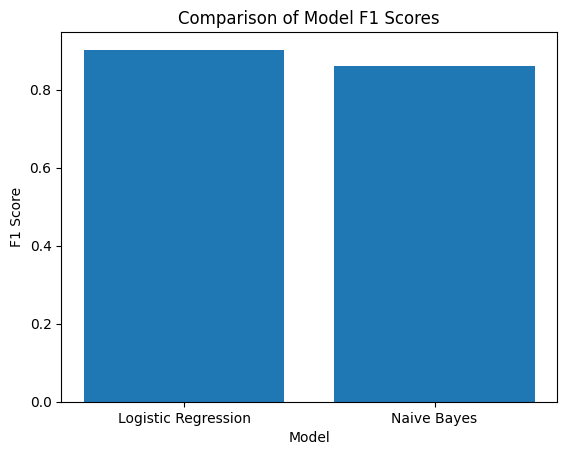

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression(max_iter=1000)
naive_bayes = MultinomialNB()


logreg.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_pred_naive_bayes = naive_bayes.predict(X_test)



f1_logreg = f1_score(y_test, y_pred_logreg, pos_label='positive')
f1_naive_bayes = f1_score(y_test, y_pred_naive_bayes, pos_label='positive')


print("F1 Score of Logistic Regression: ", f1_logreg)
print("F1 Score of Naive Bayes: ", f1_naive_bayes)


labels = ['Logistic Regression', 'Naive Bayes']
f1_values = [f1_logreg, f1_naive_bayes]

plt.bar(labels, f1_values)
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('Comparison of Model F1 Scores')
plt.show()



By comparing the performance of both the models we can see that, Logistic Regression is better as it's F1 score is higher than Naive Bayes. Logistic Regression and Naive Bayes are both good choices for text classification tasks like this one. Logistic Regression can sometimes perform better if the features are roughly linear and the problem is linearly separable, while Naive Bayes can often perform well even with less data and can handle very large feature spaces.

# **TASK 2**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install numpy
!pip install scipy
!pip install scikit-learn
!pip install pandas
!pip install tensorflow
!pip install matplotlib
!pip install nltk
!python -m nltk.downloader -f stopwords
!python -m nltk.downloader -f wordnet
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import f1_score
import re
import nltk



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Loading the dataset
data = pd.read_csv('/content/drive/MyDrive/CSE440/IMDB_Dataset.csv')
data['sentiment']=data['sentiment'].apply(lambda x: 1 if x=='positive' else 0)
data.sample(10)

# Splitting the dataset into train, test, and validation sets
train, test = train_test_split(data, test_size=0.2, random_state=42)
train, val = train_test_split(train, test_size=0.125, random_state=42)


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
import numpy as np

# Preprocessing the reviews
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train['review'])

sequence_train = tokenizer.texts_to_sequences(train['review'])
sequence_test = tokenizer.texts_to_sequences(test['review'])
sequence_val = tokenizer.texts_to_sequences(val['review'])

# Padding the sequences
data_train = pad_sequences(sequence_train)
data_test = pad_sequences(sequence_test, maxlen=data_train.shape[1])
data_val = pad_sequences(sequence_val, maxlen=data_train.shape[1])

# Converting labels to numpy array
labels_train = np.array(train['sentiment'])
labels_test = np.array(test['sentiment'])
labels_val = np.array(val['sentiment'])

In [ ]:
# Loading the GloVe embeddings
embeddings_index = {}
with open('/content/drive/MyDrive/CSE440/glove.6B.100d.txt') as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, 'f', sep=' ')
        embeddings_index[word] = coefs

# Creating an embedding matrix
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 100))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Building the model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 100, weights=[embedding_matrix], trainable=False))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Training the model
model.fit(data_train, labels_train, epochs=50, batch_size=64, validation_data=(data_val, labels_val))

Epoch 1/50
547/547 [==============================] - 49s 76ms/step - loss: 0.5400 - accuracy: 0.7227 - val_loss: 0.4632 - val_accuracy: 0.7794
Epoch 2/50
547/547 [==============================] - 48s 88ms/step - loss: 0.3830 - accuracy: 0.8306 - val_loss: 0.3238 - val_accuracy: 0.8624
Epoch 3/50
547/547 [==============================] - 41s 74ms/step - loss: 0.3207 - accuracy: 0.8628 - val_loss: 0.2959 - val_accuracy: 0.8772
Epoch 4/50
547/547 [==============================] - 41s 76ms/step - loss: 0.2926 - accuracy: 0.8775 - val_loss: 0.2845 - val_accuracy: 0.8828
Epoch 5/50
547/547 [==============================] - 42s 77ms/step - loss: 0.2738 - accuracy: 0.8877 - val_loss: 0.2885 - val_accuracy: 0.8856
Epoch 6/50
547/547 [==============================] - 41s 75ms/step - loss: 0.2599 - accuracy: 0.8917 - val_loss: 0.2834 - val_accuracy: 0.8870
Epoch 7/50
547/547 [==============================] - 41s 75ms/step - loss: 0.2412 - accuracy: 0.9013 - val_loss: 0.2720 - val_accuracy:

In [ ]:
from sklearn.metrics import f1_score

# Predicting the labels
pred_test = (model.predict(data_test) > 0.5).astype('int32')

# Calculating the F1-score
f1 = f1_score(labels_test, pred_test)
print("F1 Score:",f1)


313/313 [==============================] - 9s 27ms/step
F1 Score:  0.8852522513798781


The F1 score of RNN model is 0.88. The F1 score of the Logistic Regression is
0.9023839890120671 and the Multinomial Naive Bayes is 0.8613317043372022. So, by comparing the F1 scores, we can say that the RNN model performs better than the Naive Bayes model but worse than the Logistic Regression model.